Available columns: Index(['Booking_ID', 'Destination', 'Package_Price', 'Customer_Age', 'Rating',
       'Review_Text', 'Travel_Date'],
      dtype='object')
Missing values before handling:
 Booking_ID        0
Destination      27
Package_Price    20
Customer_Age     15
Rating           25
Review_Text      20
Travel_Date      10
dtype: int64
Number of duplicate records: 5


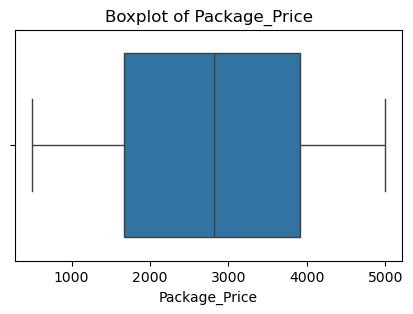

Missing values after handling:
 Booking_ID        0
Destination      27
Package_Price    20
Customer_Age      0
Rating            0
Review_Text       0
Travel_Date      10
dtype: int64
Duplicate records after cleaning: 0
Data types:
 Booking_ID         int64
Destination       object
Package_Price    float64
Customer_Age     float64
Rating           float64
Review_Text       object
Travel_Date       object
dtype: object
Cleaned dataset saved as cleaned_travel_reviews.csv


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Try importing TextBlob, otherwise provide an alternative
try:
    from textblob import TextBlob
    def correct_spelling(text):
        return str(TextBlob(text).correct()) if isinstance(text, str) else text
except ModuleNotFoundError:
    print("Warning: textblob module not found. Install it using 'pip install textblob' or proceed without spell correction.")
    def correct_spelling(text):
        return text  # Return text as is if TextBlob is unavailable

# Load the dataset
df = pd.read_csv("travel_reviews.csv")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Ensure required columns exist
required_columns = ['Customer_Age', 'Rating', 'Review_Text', 'Tour_Package', 'Package_Price']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Warning: Missing columns in dataset: {missing_columns}")
    print(f"Available columns: {df.columns}")

# Handle missing values
print("Missing values before handling:\n", df.isnull().sum())

if 'Customer_Age' in df.columns:
    df.update(df[['Customer_Age']].fillna(df['Customer_Age'].median()))
if 'Rating' in df.columns:
    df.update(df[['Rating']].fillna(df['Rating'].mode()[0]))

if 'Review_Text' in df.columns:
    df['Review_Text'] = df['Review_Text'].fillna("No review provided")

# Detect and remove duplicates
duplicates = df.duplicated()
print("Number of duplicate records:", duplicates.sum())
df = df.drop_duplicates()

# Handle inconsistent data
if 'Rating' in df.columns:
    df['Rating'] = df['Rating'].clip(1, 5)

# Correct spelling inconsistencies in Tour_Package names
if 'Tour_Package' in df.columns:
    df['Tour_Package'] = df['Tour_Package'].apply(correct_spelling)

# Identify and handle outliers
if 'Package_Price' in df.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df['Package_Price'])
    plt.title(f'Boxplot of Package_Price')
    plt.show()

    # Handling outliers using capping
    Q1 = df['Package_Price'].quantile(0.25)
    Q3 = df['Package_Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Package_Price'] = np.where(df['Package_Price'] < lower_bound, lower_bound, df['Package_Price'])
    df['Package_Price'] = np.where(df['Package_Price'] > upper_bound, upper_bound, df['Package_Price'])

# Prepare cleaned data for analysis
if 'Tour_Package' in df.columns:
    df = pd.get_dummies(df, columns=['Tour_Package'], drop_first=True)

scaler = MinMaxScaler()
if 'Customer_Age' in df.columns and 'Package_Price' in df.columns:
    df[['Customer_Age', 'Package_Price']] = scaler.fit_transform(df[['Customer_Age', 'Package_Price']])

# Data Validation
print("Missing values after handling:\n", df.isnull().sum())
print("Duplicate records after cleaning:", df.duplicated().sum())
print("Data types:\n", df.dtypes)

# Save the cleaned dataset
df.to_csv("cleaned_travel_reviews.csv", index=False)
print("Cleaned dataset saved as cleaned_travel_reviews.csv")
